<a href="https://colab.research.google.com/github/Dhamu785/Assignments/blob/main/Advanced/Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing libraries**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

import tensorflow as tf
from tensorflow.keras import models, layers

## **Reading data**

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='/content/drive/MyDrive/Colab Notebooks YouTube tutorials/zzz Assignments/03_Advanced/mnist.npz'
)

In [15]:
print(f"x train length : {len(x_train)}")
print(f"x test length : {len(x_test)}")
print(f"y train length : {len(y_train)}")
print(f"y test length : {len(y_test)}")

x train length : 60000
x test length : 10000
y train length : 60000
y test length : 10000


## **Data visualization**

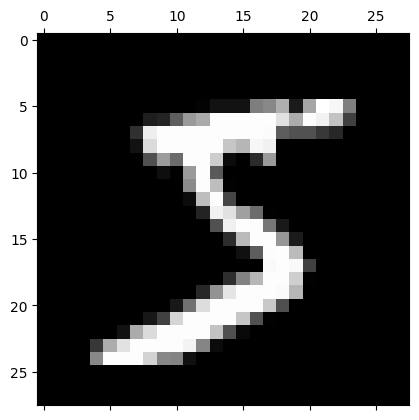

In [16]:
plt.matshow(x_train[0], cmap='gray')
plt.show()

In [17]:
def show(data):
    m = len(data)
    fig, ax = plt.subplots(1,m)
    fig.set_figwidth(1.5*m)
    for a,f in zip(fig, data):
        a.matshow(data,cmap='gray')
        a.axis('off')
    plt.show()

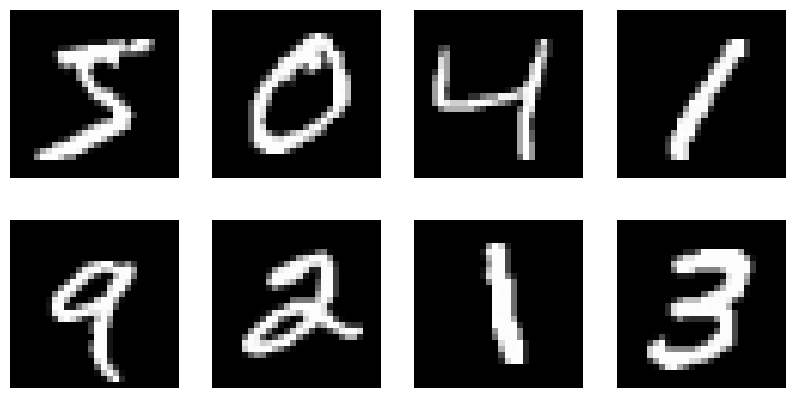

In [18]:
fig, ax= plt.subplots(2,4,figsize=(10,5))
for i in range(0,3):
    for j in range(0,4):
        if i==0:
            ax[i,j].matshow(x_train[j],cmap='gray')
            ax[i,j].axis('off')
        elif i==1:
            ax[i,j].matshow(x_train[j+4], cmap='gray')
            ax[i,j].axis('off')



In [19]:
print(y_train[0:9])

[5 0 4 1 9 2 1 3 1]


## **Data pre-processing**

In [20]:
# Numbers distribution
unique0, counts0 = np.unique(y_train, return_counts=True)
print(unique0)
print(counts0)
unique1, counts1 = np.unique(y_test, return_counts=True)
print(unique1)
print(counts1)

[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
[0 1 2 3 4 5 6 7 8 9]
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


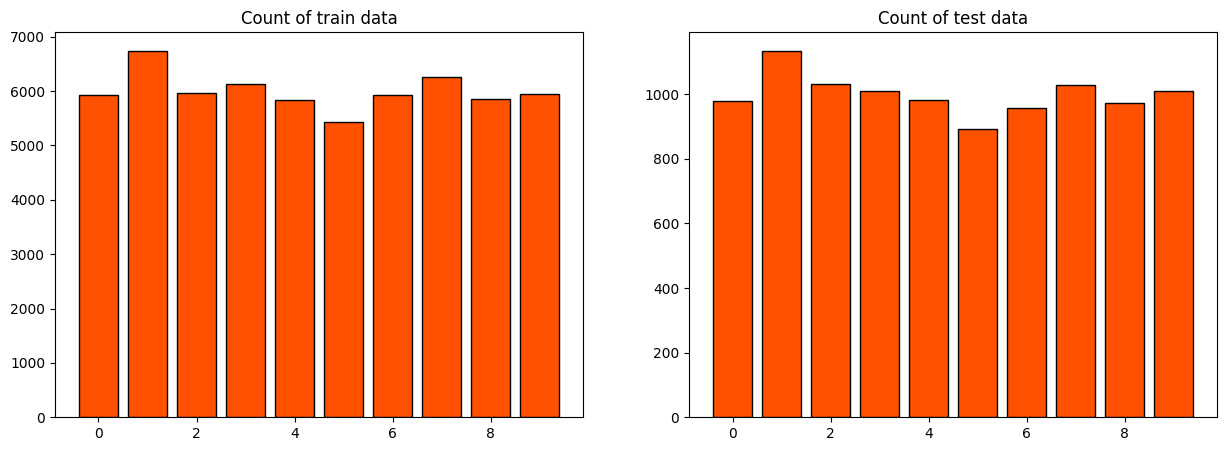

In [21]:
fig, ax= plt.subplots(1,2,figsize=(15,5))
ax[0].bar(unique0,counts0, color='#ff5100', label='Salary_1', edgecolor='black')
# ax[0].set_xticklabels(unique0)
ax[0].set_title("Count of train data")
ax[1].bar(unique1,counts1, color='#ff5100', label='Salary_1', edgecolor='black')
# ax[1].set_xticklabels(unique1)
ax[1].set_title("Count of test data")
plt.show()

In [22]:
print(f"x train shape: {x_train.shape}")
print(f"x test shape: {x_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

x train shape: (60000, 28, 28)
x test shape: (10000, 28, 28)
y train shape: (60000,)
y test shape: (10000,)


- Since each image shape is 28x28. It does not requires any preporocessing.

## **Model building**

In [23]:
model = models.Sequential([
    layers.Conv2D(16,3, padding='same',activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Flatten(),
    # layers.Dense(2050, activation='relu'),
    # layers.Dense(1050, activation='relu'),
    layers.Dense(950, activation='relu'),
    layers.Dense(60,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adamax(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 4.3373e-04 - accuracy: 0.9998
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 1.3202e-05 - accuracy: 1.0000
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3070e-04 - accuracy: 0.9999
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6190e-04 - accuracy: 0.9999
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 2.9318e-04 - accuracy: 0.9999
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 6.4163e-04 - accuracy: 0.9998
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 4.2844e-04 - accuracy: 0.9999
Epoch 8/20
1875/1875 [==============================] - 12s 6ms/step - loss: 3.7728e-04 - accuracy: 0.9999
Epoch 9/20
1875/1875 [==============================] - 12s 6ms/step - loss: 5.3374e-04 - accuracy: 0.9998
Epoch 10/20
1875/1875 [==============

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 950)              

## **Saving and loading model**

In [30]:
model.save('digits_model.keras')

In [32]:
loaded_model = tf.keras.models.load_model('digits_model.keras')

In [33]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 950)              

## **Predictions**

In [35]:
predicted = loaded_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [39]:
pre_1 = np.argmax(predicted[0])
ex_1  = y_test[0]
pre_2 = np.argmax(predicted[1])
ex_2  = y_test[1]
pre_3 = np.argmax(predicted[2])
ex_3  = y_test[2]
pre_4 = np.argmax(predicted[3])
ex_4  = y_test[3]
pre_5 = np.argmax(predicted[4])
ex_5  = y_test[4]
pre_6 = np.argmax(predicted[5])
ex_6  = y_test[5]

print(f"prediction = {pre_1}; Exact avlue = {ex_1}")
print(f"prediction = {pre_2}; Exact avlue = {ex_2}")
print(f"prediction = {pre_3}; Exact avlue = {ex_3}")
print(f"prediction = {pre_4}; Exact avlue = {ex_4}")
print(f"prediction = {pre_5}; Exact avlue = {ex_5}")
print(f"prediction = {pre_6}; Exact avlue = {ex_6}")


prediction = 7; Exact avlue = 7
prediction = 2; Exact avlue = 2
prediction = 1; Exact avlue = 1
prediction = 0; Exact avlue = 0
prediction = 4; Exact avlue = 4
prediction = 1; Exact avlue = 1


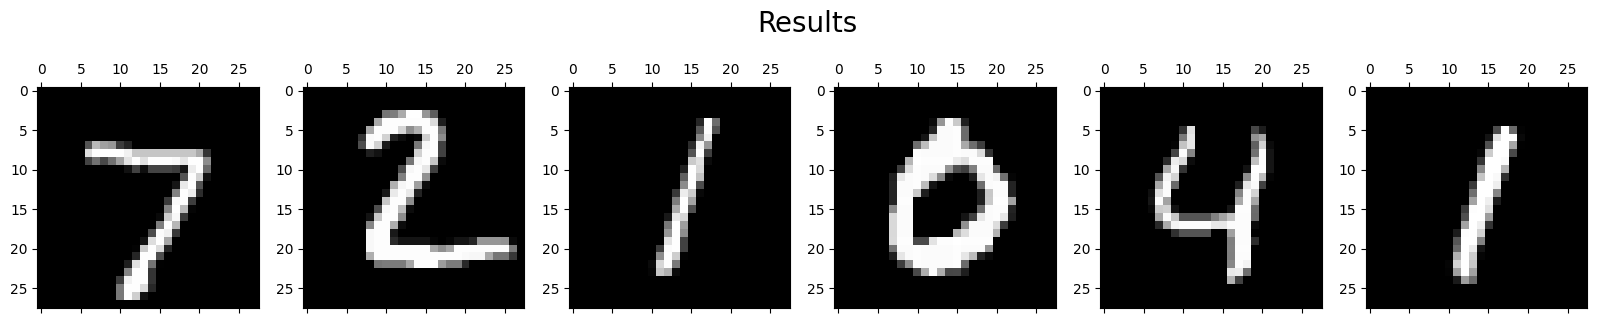

In [57]:
fig, ax= plt.subplots(1,6,figsize=(20,25))
ax[0].matshow(x_test[0], cmap='gray')
ax[1].matshow(x_test[1], cmap='gray')
ax[2].matshow(x_test[2], cmap='gray')
ax[3].matshow(x_test[3], cmap='gray')
ax[4].matshow(x_test[4], cmap='gray')
ax[5].matshow(x_test[5], cmap='gray')

fig.suptitle('Results',y=0.57,x=0.51,fontsize=20)
plt.show()

In [40]:
loaded_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0885 - accuracy: 0.9904


[0.08845450729131699, 0.9904000163078308]

### **Results**
- Train accuracy = 99.98%
- Test accuracy = 99.04%